In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()
X_train=X_train/255
X_test=X_test/255

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

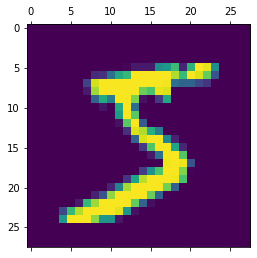

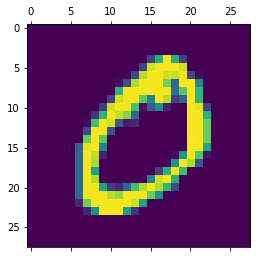

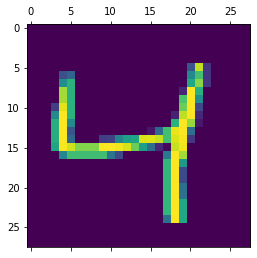

In [7]:
plt.matshow(X_train[0])
plt.matshow(X_train[1])
plt.matshow(X_train[2])

In [8]:
Y_train[0]



5

In [9]:
Y_train[1]

0

In [10]:
Y_train[2]

4

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4993 - accuracy: 0.8542
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1116 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0329 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9915
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.023

In [32]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9766


[0.10000952333211899, 0.9765999913215637]

In [34]:
y_predicted=model.predict(X_test)
y_predicted[0]

array([1.8095970e-04, 9.9798846e-01, 2.7386728e-01, 8.1458950e-01,
       8.0823898e-04, 7.0988590e-01, 6.4137646e-07, 1.0000000e+00,
       1.7228812e-02, 9.6234262e-01], dtype=float32)

2


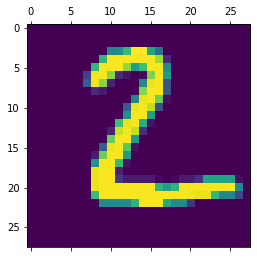

In [35]:
plt.matshow(X_test[1])
print(np.argmax(y_predicted[1]))

In [36]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [37]:

cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    2,    0,    0,    1,    1,    1,    1],
       [   1, 1123,    3,    0,    0,    1,    1,    2,    4,    0],
       [   2,    1, 1013,    2,    0,    1,    4,    5,    4,    0],
       [   1,    0,    7,  964,    0,   21,    0,    5,    4,    8],
       [   1,    1,    3,    0,  958,    0,    6,    0,    1,   12],
       [   1,    0,    0,    3,    0,  867,   10,    2,    6,    3],
       [   4,    2,    1,    1,    4,    5,  939,    0,    2,    0],
       [   1,    4,   10,    3,    0,    1,    0, 1003,    1,    5],
       [   5,    0,    4,    3,    1,    1,    8,    4,  946,    2],
       [   3,    1,    0,    2,    9,    5,    0,    6,    6,  977]])>

Text(69.0, 0.5, 'Truth')

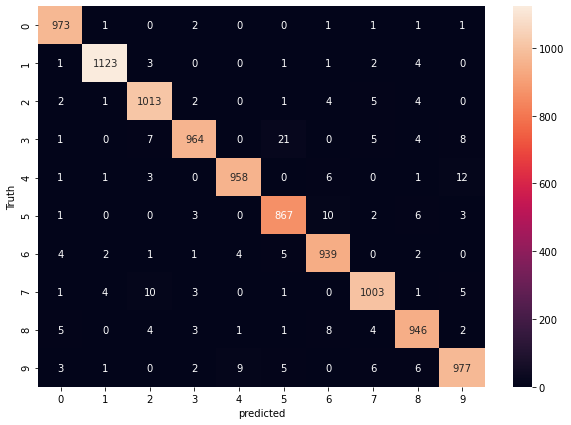

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')